GitHub [link](https://github.com/mwizard1010/Deakin-SIT799-Human_AlignedAI)!
- Name:  Hung Son Nguyen
- Student ID:  220069106
- Email:  hsngu@deakin.edu.au

Welcome to your assignment this week! 


# Classification task

In this task you are asked to build a simple Feed Forward Neural Network, train it and test it!


**After this assignment you will be able to:**

- Load a dataset.
- Train a Feed Forward Neural Network.
- Test a Feed Forward Neural Network.

Let's get started! Run the following cell to install all the packages you will need.

In [7]:
!pip install numpy
!pip install keras
!pip install tensorflow
!pip install pandas
!pip install matplotlib

Run the following cell to load the packages you will need.

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense

The dataset we will use consists of 4500 examples with 512 features. A label is given for each example to indicate positive and negative instances.

Let's read the data.

In [25]:
df = pd.read_csv('data.csv')
df.set_index('id', inplace=True)
print(df)

           v1       v2       v3       v4       v5       v6       v7       v8  \
id                                                                             
1     0.37797 -0.94808  0.01346  0.17893  0.37795  0.63571  0.13943 -0.25607   
2     0.07609 -0.09774  0.39666 -0.39026  0.10606  0.52774  0.07105  0.33720   
3     1.19391 -0.68707 -0.68422 -0.36378 -0.60847 -0.40118  1.45432  0.00592   
4     1.34949 -0.31498 -1.30248  0.50278  1.66292 -1.06094 -0.70835 -0.24237   
5    -0.03512 -0.34196  0.14230  1.50513 -0.14364  0.49429  0.07823 -0.04356   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4496  0.54554  0.63002  1.99328 -0.73290 -0.28964  0.61707  0.69515  0.87060   
4497 -0.26235  0.50776 -0.74164 -0.52717 -0.35846 -1.16202  0.21828  0.22305   
4498 -0.81564 -0.46034 -0.40044  0.21816  0.75283 -0.58075 -0.38389  0.26561   
4499  0.09764 -0.05440 -1.53883 -0.04827 -0.60092 -1.20086  0.54661 -0.45875   
4500  0.48335  1.66099 -1.98407  0.04818

Now, let's split the data into training and test sets.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    df.index.values,
    df.label.values,
    test_size=0.15,
    random_state=17,
    stratify=df.label.values
)
df['data_type'] = ['note_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'

## The data to use:

X_train = df[df['data_type']=='train'].iloc[:,:512].values
X_test = df[df['data_type']=='test'].iloc[:,:512].values
y_train = df[df['data_type']=='train'].iloc[:,512:513].values
y_test = df[df['data_type']=='test'].iloc[:,512:513].values

# Task 1

Build a Feed Forward Neural Network to address this classification task using the Keras framework.

In [22]:
# START YOUR CODE HERE
model = Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Training

Now, let's start our training.

In [23]:
history = model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1)

Epoch 1/200
3825/3825 [==============================] - 0s 67us/step - loss: 0.1768 - accuracy: 0.9273
Epoch 2/200
3825/3825 [==============================] - 0s 39us/step - loss: 0.0152 - accuracy: 0.9995
Epoch 3/200
3825/3825 [==============================] - 0s 40us/step - loss: 0.0065 - accuracy: 1.0000
Epoch 4/200
3825/3825 [==============================] - 0s 42us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 5/200
3825/3825 [==============================] - 0s 38us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 6/200
3825/3825 [==============================] - 0s 37us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 7/200
3825/3825 [==============================] - 0s 66us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 8/200
3825/3825 [==============================] - 0s 49us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 9/200
3825/3825 [==============================] - 0s 40us/step - loss: 8.5155e-04 - accuracy: 1.0000
Epoch 10/200
3825/3825 [==============================] - 0s

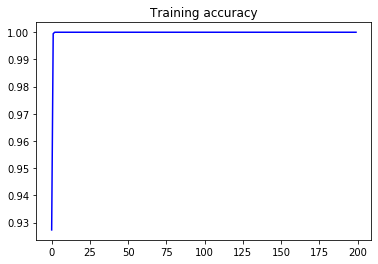

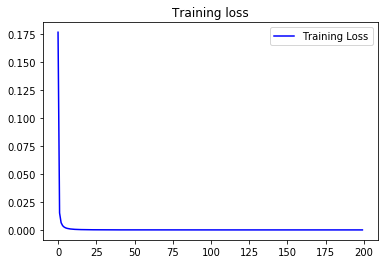

In [24]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

# Task 2

Test the model on the test set.

In [35]:
# START YOUR CODE HERE
[test_loss, test_acc] = model.evaluate(X_test, y_test, verbose=0)
print("Evaluation: Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation: Loss = 0.003374846804157035, accuracy = 0.9985185265541077


# Congratulations!

You've come to the end of this assignment, and you have built your first neural network. 

Congratulations on finishing this notebook! 

